In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/air_quality_data.csv")   # change path if needed

print("Dataset info before cleaning:")
print(data.info())

Dataset info before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [ ]:
# Step 1: Convert 'Date' column to datetime (and keep it this time)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Step 2: Define numeric columns
num_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
               'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Step 3: Convert numeric columns properly
for column in num_columns:
    if column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')

In [ ]:
# Step 4: Fill missing numeric values with column mean
for column in num_columns:
    if column in data.columns:
        data[column].fillna(data[column].mean(), inplace=True)

# Step 5: Fill missing text values (like City or AQI_Bucket) with most frequent value
cat_columns = ['City', 'AQI_Bucket']
for column in cat_columns:
    if column in data.columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Step 6: Remove duplicates
data = data.drop_duplicates()
print("\nAfter removing duplicates:", data.shape)


After removing duplicates: (29531, 16)


/tmp/ipython-input-363930108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
/tmp/ipython-input-363930108.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# Step 7: Remove negative or invalid numeric values
for column in num_columns:
    if column in data.columns:
        data = data[data[column] >= 0]

# Step 8: Sort by date (important for time-based models)
if 'Date' in data.columns:
    data = data.sort_values(by='Date').reset_index(drop=True)

In [ ]:
print("\nCleaned dataset info:")
print(data.info())
print("\nPreview of cleaned data:")
print(data.head())

# Step 9: Save cleaned dataset
cleaned_path = "/content/cleaned_air_quality.csv"
data.to_csv(cleaned_path, index=False)
print(f"\nCleaned dataset saved at: {cleaned_path}")


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtyp

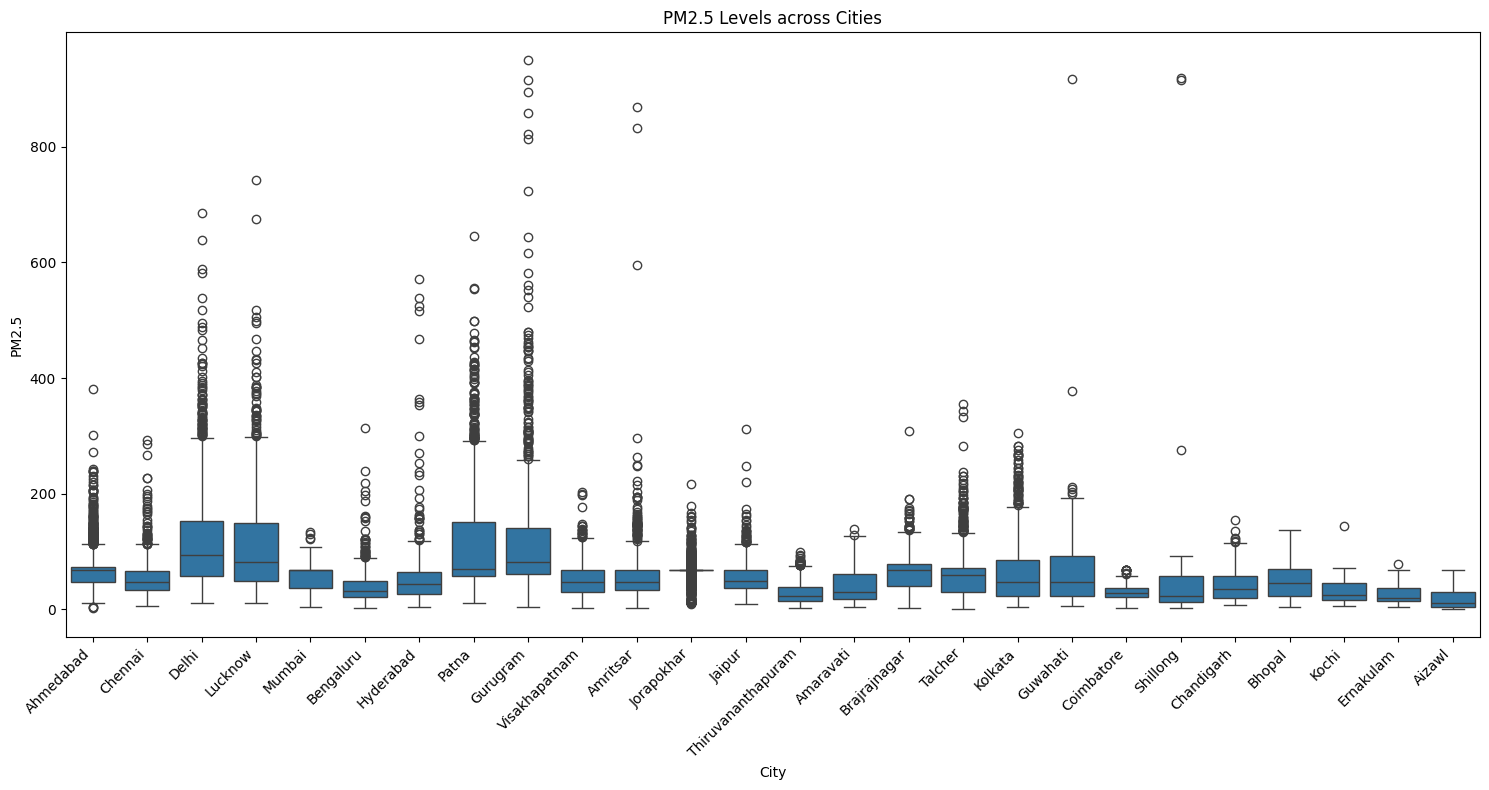

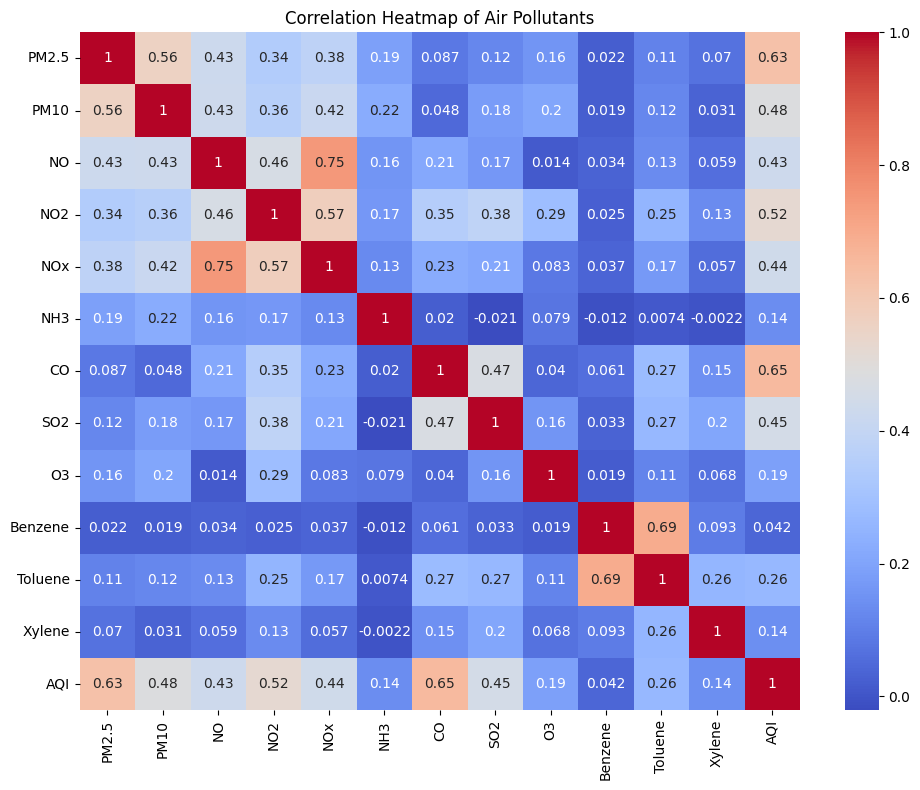

In [ ]:
# Step 10: Visualization

# Boxplot for PM2.5 distribution across cities
plt.figure(figsize=(15, 8))
sns.boxplot(x='City', y='PM2.5', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('PM2.5 Levels across Cities')
plt.tight_layout()
plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
corr = data[num_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Air Pollutants')
plt.tight_layout()
plt.show()